# 3 数据集Oakland Crime Statistics分析

## 3.1 概述

该数据集有从2011年到2016年的数据，共有10项属性标签，分别是：

* Agency：机构
* Create Time：立案时间
* Location：案件位置
* Area Id：区域ID
* Beat：巡逻区域
* Priority：案件优先级
* Incident Type Id：事件类型ID
* Incident Type Description：事件类型描述
* Event Number：事件编号
* Closed Time：结案时间

## 3.2 导入&预览数据

数据分析工具：

* Numpy
* Pandas

可视化工具：

* Matplotlib
* Seaborn

In [8]:
import os
import sys
import math
import pandas as pd
import numpy as np
import csv
import json
import pickle
import matplotlib.pyplot as plt
from scipy import stats
from pandas.core import datetools
import statsmodels.api as sm
import time
# 内嵌画图
%matplotlib inline

分别导入并预览前几条数据。数据位于 data/OaklandCrime/records-for-201X.csv 这几个CSV文件中，使用Pandas库中的read_csv()方法将CSV文件的内容加载到Pandas DataFrame()对象中。首先预览2011年的数据：

In [9]:
data1 = pd.read_csv('./data/OaklandCrime/records-for-2011.csv')
data2 = pd.read_csv('./data/OaklandCrime/records-for-2012.csv')
data3 = pd.read_csv('./data/OaklandCrime/records-for-2013.csv')
data4 = pd.read_csv('./data/OaklandCrime/records-for-2014.csv')
data5 = pd.read_csv('./data/OaklandCrime/records-for-2015.csv')
data6 = pd.read_csv('./data/OaklandCrime/records-for-2016.csv')
data1.head()

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
0,OP,2011-01-01T00:00:00.000,ST&SAN PABLO AV,1.0,06X,1.0,PDOA,POSSIBLE DEAD PERSON,LOP110101000001,2011-01-01T00:28:17.000
1,OP,2011-01-01T00:01:11.000,ST&HANNAH ST,1.0,07X,1.0,415GS,415 GUNSHOTS,LOP110101000002,2011-01-01T01:12:56.000
2,OP,2011-01-01T00:01:25.000,ST&MARKET ST,1.0,10Y,2.0,415GS,415 GUNSHOTS,LOP110101000003,2011-01-01T00:07:20.000
3,OP,2011-01-01T00:01:35.000,PRENTISS ST,2.0,21Y,2.0,415GS,415 GUNSHOTS,LOP110101000005,2011-01-01T00:02:28.000
4,OP,2011-01-01T00:02:10.000,AV&FOOTHILL BLVD,2.0,20X,1.0,415GS,415 GUNSHOTS,LOP110101000004,2011-01-01T00:50:04.000


In [23]:
data1.shape

(180016, 10)

In [24]:
data2.shape

(187431, 11)

In [25]:
data3.shape

(188052, 10)

In [27]:
data4.shape

(187480, 11)

In [28]:
data5.shape

(192581, 10)

In [29]:
data6.shape

(110828, 10)

In [117]:
data_all=[data1,data2,data3,data4,data5,data6]

In [129]:
cols1 = list(data1)
cols2 = list(data2)
cols3 = list(data3)
cols4 = list(data4)
cols5 = list(data5)
cols6 = list(data6)
cols_all = [cols1,cols2,cols3,cols4,cols5,cols6]
print(cols1)
print(cols2)
print(cols3)
print(cols4)
print(cols5)
print(cols6)

['Agency', 'Create Time', 'Location', 'Area Id', 'Beat', 'Priority', 'Incident Type Id', 'Incident Type Description', 'Event Number', 'Closed Time']
['Agency', 'Create Time', 'Area Id', 'Beat', 'Priority', 'Incident Type Id', 'Incident Type Description', 'Event Number', 'Closed Time', 'Location 1', 'Zip Codes']
['Agency', 'Create Time', 'Location ', 'Area Id', 'Beat', 'Priority', 'Incident Type Id', 'Incident Type Description', 'Event Number', 'Closed Time']
['Agency', 'Create Time', 'Area Id', 'Beat', 'Priority', 'Incident Type Id', 'Incident Type Description', 'Event Number', 'Closed Time', 'Location 1', 'Zip Codes']
['Agency', 'Create Time', 'Location', 'Area Id', 'Beat', 'Priority', 'Incident Type Id', 'Incident Type Description', 'Event Number', 'Closed Time']
['Agency', 'Create Time', 'Location', 'Area Id', 'Beat', 'Priority', 'Incident Type Id', 'Incident Type Description', 'Event Number', 'Closed Time']


可以从属性信息中看到，2012年和2014年多出了其他年份没有的属性Zip Codes，在具体分析中，为保证统一，将不对其进行考虑。

## 3.3 数据摘要与可视化

### 3.3.1 数据摘要

#### 3.3.1.1 标称属性统计频数

标称属性包括：Agency，Create Time，Location，Beat，Incident Type Id，Incident Type Description，Event Number，Closed Time

对字符串类型的属性返回的结果描述：

* count：列中值的总数
* unique：列中唯一值的计数
* top：列中重复次数最多的值
* freq：列中顶部重复的次数

In [217]:
for data,cols in zip(data_all,cols_all):
    for col in cols: 
        print(data[col].value_counts())
        print('-' * 60)
    print("=" * 60)
    

OP    180015
Name: Agency, dtype: int64
------------------------------------------------------------
2011-06-02T00:00:00.000    4
2011-03-27T00:22:41.000    3
2011-09-21T14:05:59.000    3
2011-05-01T18:31:50.000    2
2011-05-12T21:04:34.000    2
                          ..
2011-10-15T10:38:11.000    1
2011-02-02T21:48:32.000    1
2011-02-09T13:58:47.000    1
2011-05-10T09:53:55.000    1
2011-05-02T14:44:02.000    1
Name: Create Time, Length: 179451, dtype: int64
------------------------------------------------------------
 INTERNATIONAL BLVD        3866
 MACARTHUR BLVD            3129
 AV&INTERNATIONAL BLVD     3067
 BROADWAY                  2132
 FOOTHILL BLVD             1791
                           ... 
FRUITVALE DAVIS ST            1
43RD STANLEY AV               1
70TH W MACARTHUR BLVD         1
34TH EMBARCADERO WEST         1
28TH CT&COLLEGE AV            1
Name: Location, Length: 32505, dtype: int64
------------------------------------------------------------
1.0    79152
2

** 各年份巡逻区域不同立案等级频数统计及可视化 **

Year 2011:

The Beats With the Most Reports (Priority 1, Decending Order): ['04X', '26Y', '08X', '06X', '34X'] 
The Beats With the Most Reports (Priority 2, Decending Order): ['04X', '08X', '30Y', '26Y', '19X'] 
Unique Beats: ['08X', '26Y', '06X', '19X', '04X', '30Y', '34X']
Common Beats: ['08X', '26Y', '04X']
****************************************************************************************************
Year 2012:

The Beats With the Most Reports (Priority 1, Decending Order): ['04X', '08X', '26Y', '34X', '30Y'] 
The Beats With the Most Reports (Priority 2, Decending Order): ['04X', '08X', '30Y', '19X', '23X'] 
Unique Beats: ['08X', '26Y', '23X', '19X', '04X', '30Y', '34X']
Common Beats: ['08X', '30Y', '04X']
****************************************************************************************************
Year 2013:

The Beats With the Most Reports (Priority 1, Decending Order): ['04X', '08X', '34X', '26Y', '30X'] 
The Beats With the Most Reports (Priority 2, Decending Order):

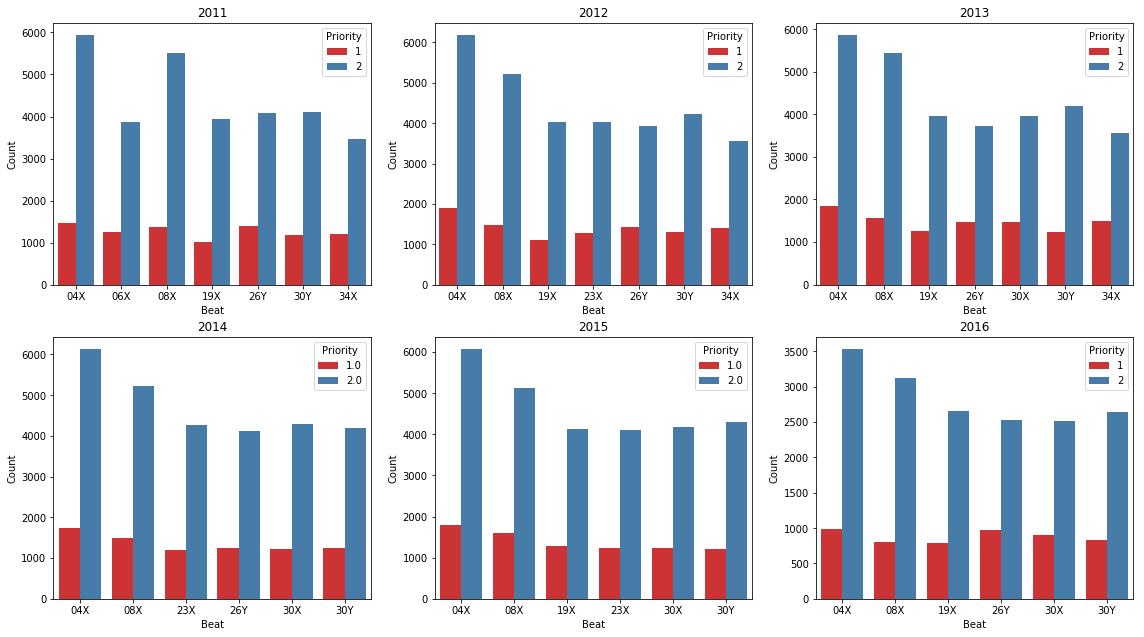

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=3)
plt.subplots_adjust(left=0, right=2.5, top=3, bottom=1)
i = 0
for row in ax:
    for col in row:
        col.set_title(str(2011 + i))
        #sns.countplot(data=crimes_list[i].loc[crimes_list[i]['Incident Type Id'].isin(nlargest[i])], x="Incident Type Id", hue="Priority", palette="Set1", ax=col)
        temp = crimes_list[i].groupby(by=["Beat", "Priority"],sort=True, as_index=False).count().rename(index=str, columns={"Create Time": "Count"})[["Beat", "Priority", "Count", "time_of_the_day"]]
        beats_prio_1 = list(temp[temp["Priority"] == 1].nlargest(5, "Count")["Beat"].values)
        beats_prio_2 = list(temp[temp["Priority"] == 2].nlargest(5, "Count")["Beat"].values)
        print("Year " + str(2011 +i ) +":\n")
        print("The Beats With the Most Reports (Priority 1, Decending Order): {} \nThe Beats With the Most Reports (Priority 2, Decending Order): {} \nUnique Beats: {}".format(str(beats_prio_1), str(beats_prio_2), str(list(set(beats_prio_1)|set(beats_prio_2)))))
        print("Common Beats: {}".format(str(list(set(beats_prio_1) & set(beats_prio_2)))))
        sns.barplot(data=temp[temp["Beat"].isin(beats_prio_1 + beats_prio_2)], x="Beat", y="Count", hue="Priority",palette="Set1", ax=col)
        print("*" * 100)
        i += 1

图中明显可以看到，04X的报案数较多，证明此巡逻区域的治安情况比其他区域差；治安较好（报案数）区域是19X和23X。

#### 3.3.1.2 数值属性计算五数概括和缺失值

直接可以进行统计的数值属性为Priority（意义不大），可以间接进行五数概括的数值属性是Create Time属性的年份和时间，先对Priority属性返回的结果描述：

* count：列中值的总数
* mean：列中唯一值的计数
* std：该列中重复次数最多的值
* min：列中最小值
* 25%：第一个四分位数的值
* 50%：第二个四分位数的值
* 75%：第三个四分位数的值
* max：列中的最大值

五数概括：最小值，Q1，中位数，Q3，最大值

In [146]:
number_data = ['Priority']
for data in data_all:
    print(data[number_data].describe())

            Priority
count  180015.000000
mean        1.796111
std         0.402916
min         0.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
            Priority
count  187430.000000
mean        1.776311
std         0.416717
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
            Priority
count  188051.000000
mean        1.770206
std         0.420967
min         0.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
            Priority
count  187480.000000
mean        1.771853
std         0.419639
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
            Priority
count  192581.000000
mean        1.779729
std         0.414443
min         0.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
            Priority
count  110827.000000
mean        1

接下来对时间数据进行预处理，将时间换算成秒，并划分为几个时间段，并剔除数据中的空值：

In [1]:
import seaborn as sns
import ast
import datetime as dt
from dateutil import tz
from dateutil import parser

In [2]:
intervals = (
    ('weeks', 604800),
    ('days', 86400),
    ('hours', 3600),    # 60 * 60
    ('minutes', 60),
    ('seconds', 1),
    )


def get_nlargest_incident_id(n, df):
    return df.groupby(by="Incident Type Id",sort=True, as_index=False).count().nlargest(n, 'Create Time')["Incident Type Id"].values
def get_nlargest_area_id(n, df):
    return df.groupby(by="Area Id",sort=True, as_index=False).count().nlargest(n, 'Create Time')["Area Id"].values
def display_time(seconds, granularity=10):
    result = []

    for name, count in intervals:
        value = seconds // count
        if value:
            seconds -= value * count
            if value == 1:
                name = name.rstrip('s')
            result.append("{} {}".format(value, name))
    return ', '.join(result[:granularity])

def map_x(x):
    if x.hour < 6:
        return "00AM-6AM"
    if x.hour < 12 and x.hour > 6:
        return "6AM-12PM"
    if x.hour >= 12 and x.hour<18:
        return "12PM-6PM"
    if x.hour > 18:
        return "6PM-00AM"
    
def prep_data(df):
    df['Create Time'] = df['Create Time'].fillna(df['Closed Time'])
    df['Closed Time'] = df['Closed Time'].fillna(df['Create Time'])
    df["time_between_creation_and_closed_seconds"] = df.apply(lambda x: abs((parser.parse(x["Closed Time"]) - parser.parse(x["Create Time"])).seconds), axis=1)
    df["time_of_the_day"] = df["Create Time"].map(lambda x:map_x(parser.parse(x)))
    df.replace(r'', np.nan, regex=True, inplace=True)
    df["Area Id"].fillna(-1, inplace=True)
    df["Beat"].fillna("Unknown", inplace=True)
    df["Priority"].fillna("-1", inplace=True)
    df["Priority"].astype(int)
    df.drop(["Agency", "Event Number"], inplace=True, axis=1)
    df["day_of_the_month"] = df["Create Time"].apply(lambda x: parser.parse(x).day)
    df["day_of_the_week"] = df["day_of_the_month"].apply(lambda x: (x % 7) + 1)
    df["month_of_the_year"] = df["Create Time"].apply(lambda x: parser.parse(x).month)
    return df

再进行五数概括的预处理，其中五数概括分别是：Minimum、Q1、Median、Q3、Maximum。

In [3]:
def fiveNumber(nums):
    Minimum = min(nums)
    Maximum = max(nums)
    Q1 = np.percentile(nums, 25)
    Median = np.median(nums)
    Q3 = np.percentile(nums, 75)

    IQR = Q3-Q1
    lower_limit = Q1-1.5*IQR  # 下限值
    upper_limit = Q3+1.5*IQR  # 上限值

    return Minimum, Q1, Median, Q3, Maximum, lower_limit, upper_limit


def printfiveNumber(fivenumber):
    print("*" * 40)
    print("Min = {fivenumber[0]}")
    print("Q1  = {fivenumber[1]}")
    print("Median = {fivenumber[2]}")
    print("Q3 = {fivenumber[3]}")
    print("Max = {fivenumber[4]}")
    print("*" * 40)

In [10]:
# 处理2011年数据
crimes_2011 = data1
crimes_2011.drop(index=[180015], inplace=True)
crimes_2011 = prep_data(crimes_2011)
crimes_2011.rename(index=str, columns={"Location": "address"}, inplace=True)
crimes_2011["Priority"].replace(0.0, 1.0, inplace=True)
crimes_2011["Priority"] = crimes_2011["Priority"].astype(int)

In [11]:
# 处理2012年数据
crimes_2012 = data2
crimes_2012.dropna(thresh=9, inplace=True)
crimes_2012 = prep_data(crimes_2012)
crimes_2012.rename(index=str, columns={"Location ": "address"}, inplace=True)
crimes_2012["Area Id"] = crimes_2012["Area Id"].astype(int)
crimes_2012["Priority"].replace(0.0, 1.0, inplace=True)
crimes_2012["Priority"] = crimes_2012["Priority"].astype(int)

In [12]:
# 处理2013年数据
crimes_2013 = data3
crimes_2013.dropna(thresh=9, inplace=True)
crimes_2013 = prep_data(crimes_2013)
crimes_2013.rename(index=str, columns={"Location ": "address"}, inplace=True)
crimes_2013["Area Id"] = crimes_2013["Area Id"].astype(int)
crimes_2013["Priority"].replace(0.0, 1.0, inplace=True)
crimes_2013["Priority"] = crimes_2013["Priority"].astype(int)

In [13]:
# 处理2014年数据
crimes_2014 = data4
crimes_2014.dropna(thresh=9, inplace=True)
crimes_2014 = prep_data(crimes_2014)
crimes_2014.rename(index=str, columns={"Location ": "address"}, inplace=True)
crimes_2014["Area Id"] = crimes_2013["Area Id"].astype(int)
crimes_2014["Priority"].replace(0.0, 1.0, inplace=True)
crimes_2014["Priority"] = crimes_2013["Priority"].astype(int)

In [14]:
# 处理2015年数据
crimes_2015 = data5
crimes_2015.dropna(thresh=9, inplace=True)
crimes_2015 = prep_data(crimes_2015)
crimes_2015.rename(index=str, columns={"Location ": "address"}, inplace=True)
crimes_2015["Area Id"] = crimes_2013["Area Id"].astype(int)
crimes_2015["Priority"].replace(0.0, 1.0, inplace=True)
crimes_2015["Priority"] = crimes_2013["Priority"].astype(int)

In [15]:
# 处理2016年数据
crimes_2016 = data6
crimes_2016.dropna(thresh=9, inplace=True)
crimes_2016 = prep_data(crimes_2016)
crimes_2016.rename(index=str, columns={"Location": "address"}, inplace=True)
crimes_2016["Priority"] = crimes_2016["Priority"].astype(int)

In [16]:
crimes_list = [crimes_2011, crimes_2012, crimes_2013, crimes_2014, crimes_2015, crimes_2016]

In [17]:
print("五数概括")
print("*" * 40)
for i, crime_year in enumerate(crimes_list):
    five = fiveNumber(crime_year[crime_year["Priority"] == 1]["time_between_creation_and_closed_seconds"])
    print(str(2011+i)+"time_between_creation_and_closed_seconds")
    printfiveNumber(five)

五数概括
****************************************
2011time_between_creation_and_closed_seconds
****************************************
Min = {fivenumber[0]}
Q1  = {fivenumber[1]}
Median = {fivenumber[2]}
Q3 = {fivenumber[3]}
Max = {fivenumber[4]}
****************************************
2012time_between_creation_and_closed_seconds
****************************************
Min = {fivenumber[0]}
Q1  = {fivenumber[1]}
Median = {fivenumber[2]}
Q3 = {fivenumber[3]}
Max = {fivenumber[4]}
****************************************
2013time_between_creation_and_closed_seconds
****************************************
Min = {fivenumber[0]}
Q1  = {fivenumber[1]}
Median = {fivenumber[2]}
Q3 = {fivenumber[3]}
Max = {fivenumber[4]}
****************************************
2014time_between_creation_and_closed_seconds
****************************************
Min = {fivenumber[0]}
Q1  = {fivenumber[1]}
Median = {fivenumber[2]}
Q3 = {fivenumber[3]}
Max = {fivenumber[4]}
***************************************

### 3.3.2 数据可视化

#### 3.3.2.1 案件处理时长随年份的变化盒图

<Figure size 432x288 with 0 Axes>

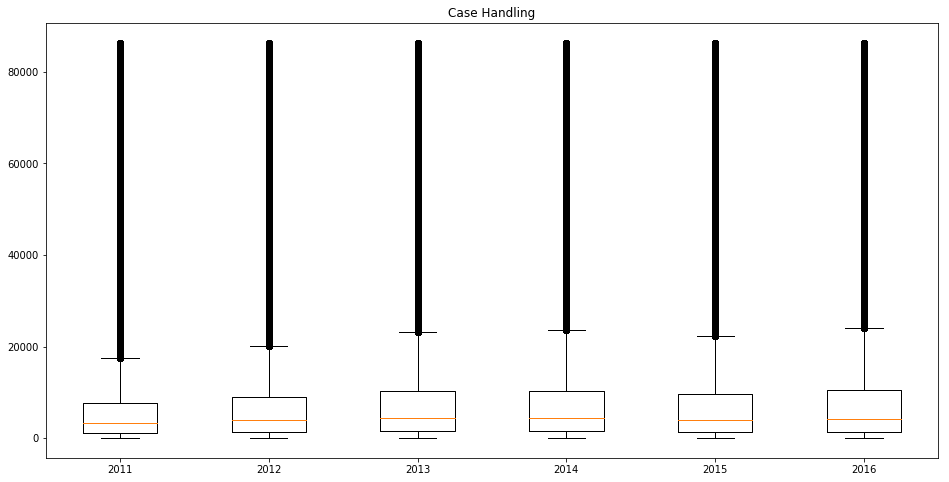

In [19]:
def box_plot(all_data):
    fig = plt.figure(figsize=(16,8))
    plt.boxplot(all_data,notch=False, sym='o',vert=True)
    year_list = []
    for i in range(2011,2017):
        year_list.append(str(i))
    plt.xticks([i for i in range(1,7)],year_list)
    t = plt.title('Case Handling')
    plt.show()
    
box = []
for crime_year in crimes_list:
    plt.subplots_adjust(left=0, right=2.5, top=3, bottom=1)
    box.append(crime_year["time_between_creation_and_closed_seconds"])
box_plot(box)

#### 3.3.2.2 各年份每月立案数量趋势柱状图

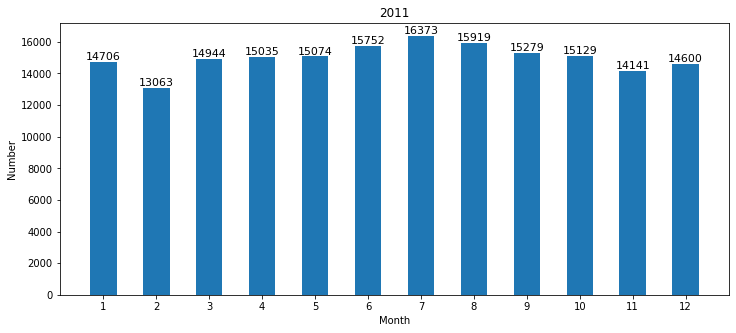

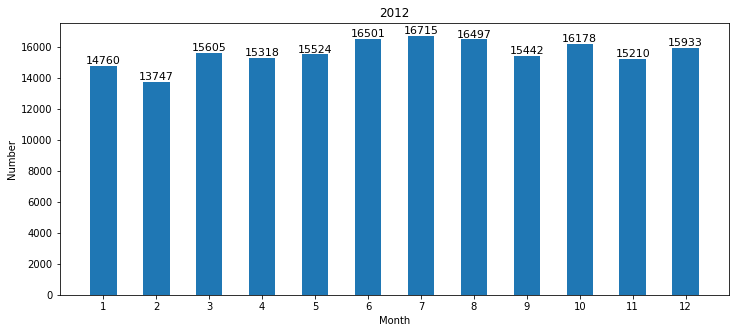

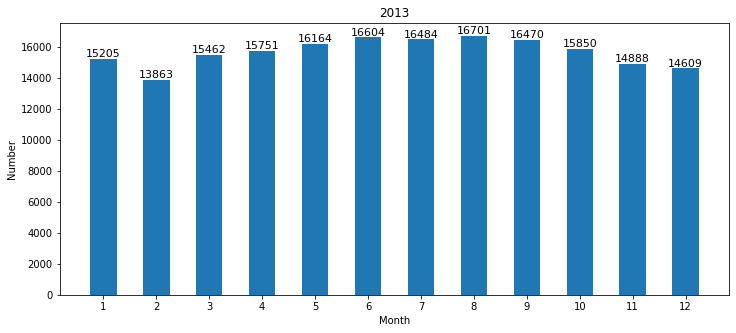

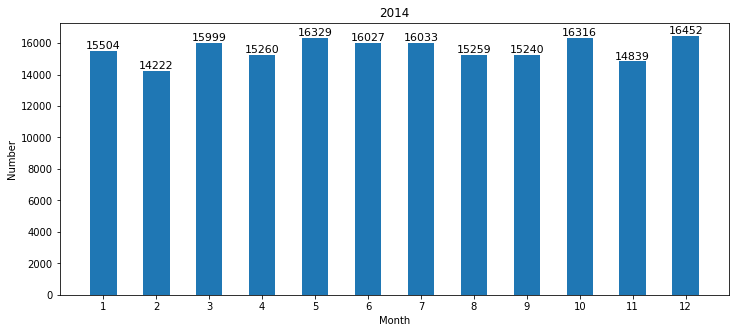

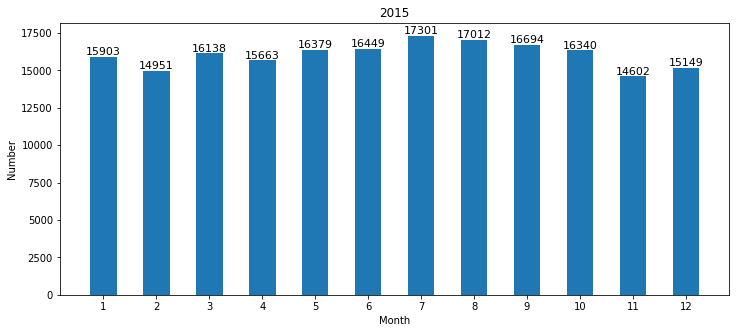

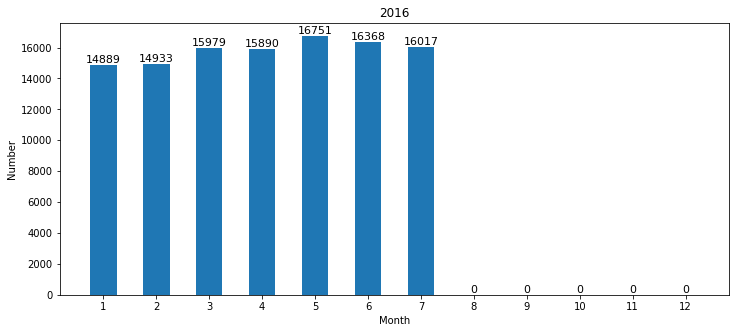

In [93]:
t = 0
mon = 0
index = np.arange(12)
k = 1
year = 2011
for data in data_all:
    lis = data['Create Time']
    lis = lis.dropna()
    lis = lis.values
    mon_count=np.zeros(12)
    for t in lis:
        mon = t[5:7]
        mon_count[int(mon)-1] += 1
    # print(mon_count)
    plt.figure(figsize=(12,5))
    plt.bar(index,mon_count, 0.5, label="mon_count")
    plt.xticks(index,('1','2','3','4','5','6','7','8','9','10','11','12'))
    for a,b in zip(index,mon_count):  
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
    plt.xlabel("Month")
    plt.ylabel("Number")  
    plt.title(year)
    year=year+1

上图分别展示了不同年份每月的立案数量，基本都分布在1.5万起左右，且大多都多于1.5万起，同时，在2016年7月后存在着较多的缺失，这与数据集的收集时间有关。也可以明显观察出，在2月和11月的立案数量多低于其他月份。

#### 3.3.2.3 各年份不同事件等级每天报案时间段分布图

通过之前的数据预处理，将报案时间分为不同的时间段，可以较为方便地进行该可视化部分。

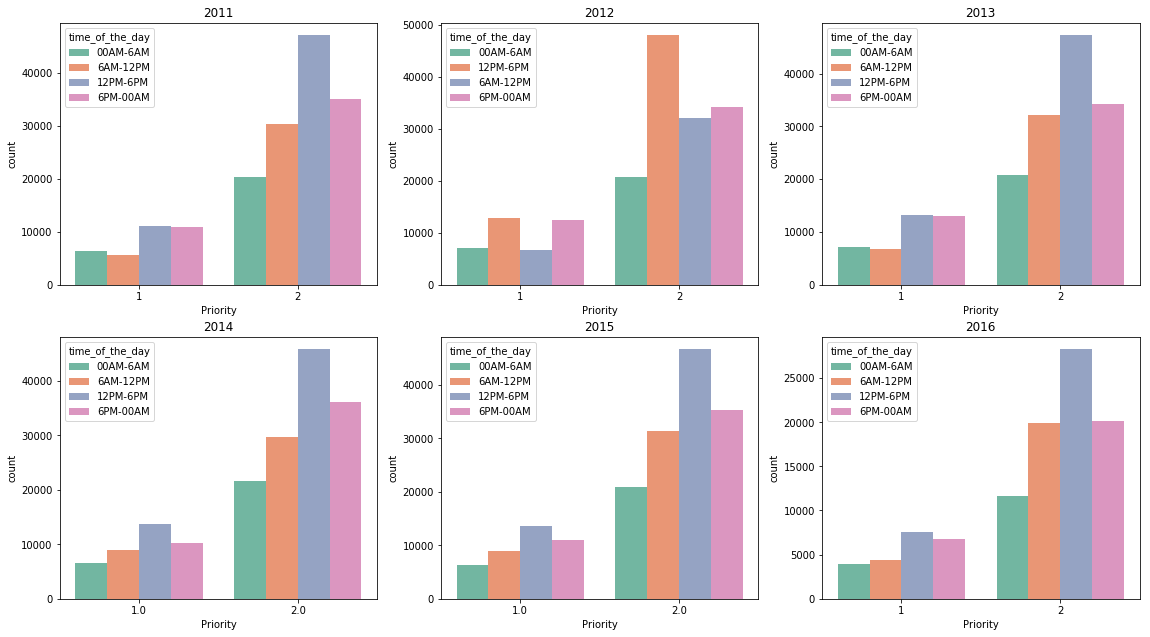

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=3)
plt.subplots_adjust(left=0, right=2.5, top=3, bottom=1)
i = 0
for row in ax:
    for col in row:
        col.set_title(str(2011 + i))
        sns.countplot(data=crimes_list[i], x="Priority", hue="time_of_the_day", palette="Set2", ax=col)
        i+=1

上图直观地反映了不同优先级的案件，在每天的报案时间段以及数量的差异，显然2.0级的远多于1.0级的，同时，报案时间也较多分布在中午12点到下午6点之间；在其他时间段中，夜间报案数也更多一些。

#### 3.3.2.4 各年份案件等级分布及盒图

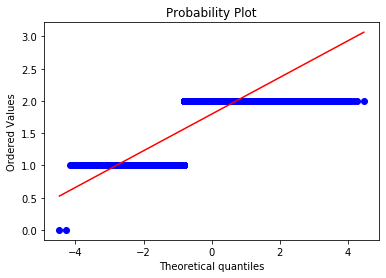

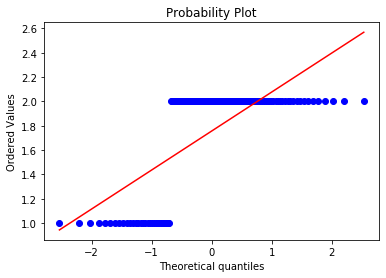

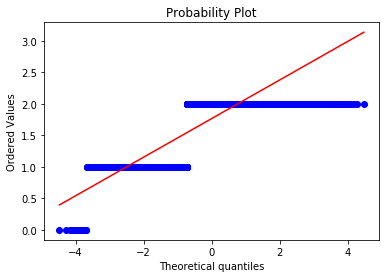

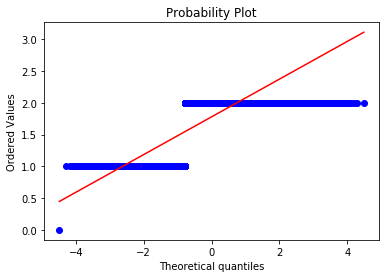

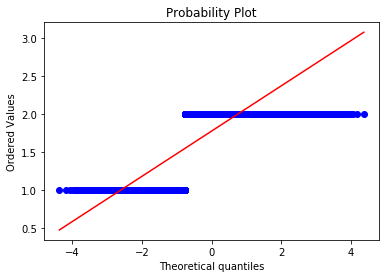

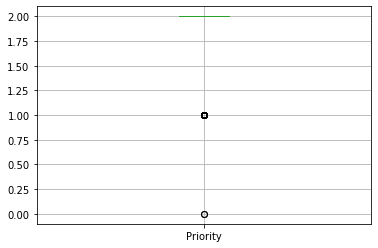

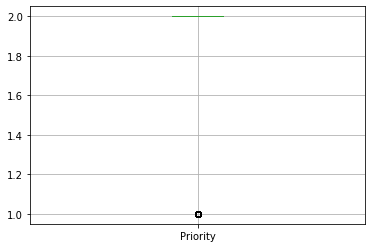

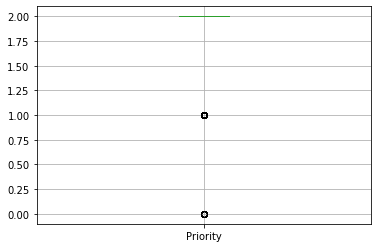

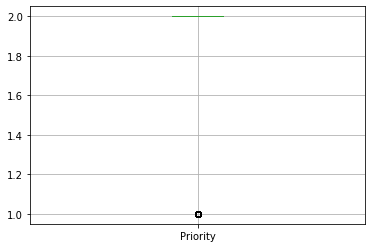

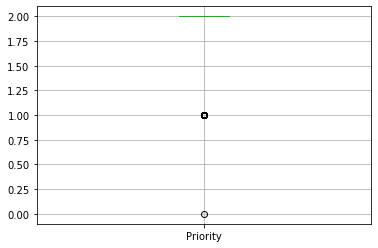

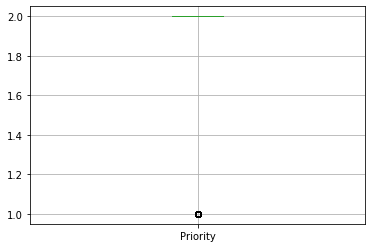

In [157]:
for data in data_all:
    data = data.dropna()
    stats.probplot(data['Priority'],dist="norm",plot=plt)
    plt.show()
for data in data_all:
    data.boxplot(column=['Priority'])
    plt.show()

从图中可以明显看出，案件等级不服从正态分布，2.0为最低等级的案件，因为在生活中立案也是低等级案件多于高等级案件数，这符合生活常识的逻辑。

#### 3.3.2.5 合并时间轴后统计2011到2016年每天的犯罪数

In [21]:
def Master():
    setOf = ['./data/OaklandCrime/records-for-2011.csv','./data/OaklandCrime/records-for-2012.csv','./data/OaklandCrime/records-for-2013.csv',
             './data/OaklandCrime/records-for-2014.csv','./data/OaklandCrime/records-for-2015.csv','./data/OaklandCrime/records-for-2016.csv']
    
    for x in range(len(setOf)):
        temp = pd.read_csv(setOf[x])
        temp['DATE'] = pd.to_datetime(temp['Create Time'],dayfirst=True)
        temp['DATE'] = temp['DATE'].dt.date
        temp.set_index('DATE',inplace=True)
        temp.index = pd.to_datetime(temp.index,dayfirst=True)
        temp['Count'] = 1
        temp = temp[['Count']].resample(rule='D').sum()
        if (x == 0):
            Master = temp
        Master = pd.concat([Master,temp])
    return Master

In [22]:
df = Master()

Text(0,0.5,'Number of Crimes per Day')

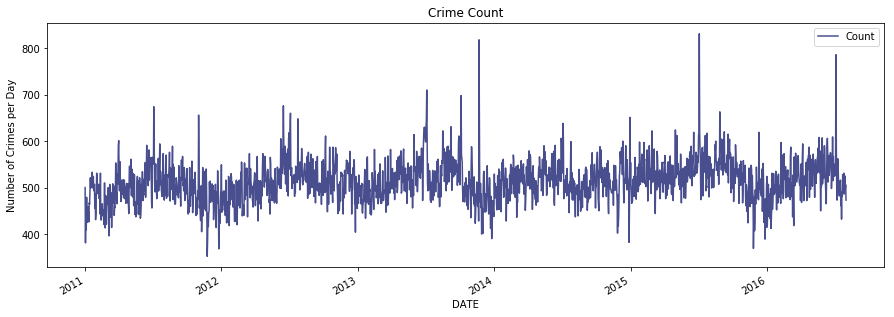

In [23]:
df.plot(figsize=(15,5), color='#494e8f')
plt.title('Crime Count')
plt.ylabel('Number of Crimes per Day')

可以观察到，这几年中2014、2015和2016年中存在立案数量极为突出的几个峰值，但案件数整体峰值较多的年份多在2011-2013年，这也反映了治安程度上一定的进步。

## 3.4 数据缺失处理

### 3.4.1 总览数据缺失

查看每个列中缺失的总和，处理NaN和np.null的值。

In [131]:
for data,cols in zip(data_all,cols_all):
    print(data.isnull()[cols].sum())
    print("=" * 60)

Agency                         1
Create Time                    1
Location                       0
Area Id                      904
Beat                         520
Priority                       1
Incident Type Id               1
Incident Type Description      1
Event Number                   1
Closed Time                    7
dtype: int64
Agency                            1
Create Time                       1
Area Id                        1415
Beat                            984
Priority                          1
Incident Type Id                  1
Incident Type Description         1
Event Number                      1
Closed Time                      19
Location 1                       70
Zip Codes                    187256
dtype: int64
Agency                          1
Create Time                     1
Location                        0
Area Id                      2258
Beat                         1178
Priority                        1
Incident Type Id                1
Incident T

主要缺失的为Area ID和Beat属性，缺失最多的年份为2014年，以下内容对该部分进行缺失处理。

In [212]:
for data in data_all:
    data_ = data[['Incident Type Id','Incident Type Description']]
    data_=data_[data_.isnull().T.any()]
    print(data_)
    print("=" * 50)

       Incident Type Id Incident Type Description
180015              NaN                       NaN
       Incident Type Id Incident Type Description
187255              NaN                       NaN
       Incident Type Id Incident Type Description
178947              JGP                       NaN
185820              JGP                       NaN
186584              JGP                       NaN
187409              JGP                       NaN
188051              NaN                       NaN
       Incident Type Id Incident Type Description
2382                JGP                       NaN
11137               JGP                       NaN
13174               JGP                       NaN
18605               JGP                       NaN
37673               JGP                       NaN
...                 ...                       ...
182424              JGP                       NaN
183100              JGP                       NaN
184135              JGP                       NaN


分析 Incident Type Id Incident 和 Type Description ，发现类型为JGP的案件其事件描述均为Nan，这可能说明JGP难以描述。

### 3.4.2 数值数据的缺失处理

每个年份的处理基本一致，此处以2011年为例来进行数据缺失处理。

#### 3.4.2.1 剔除缺失部分

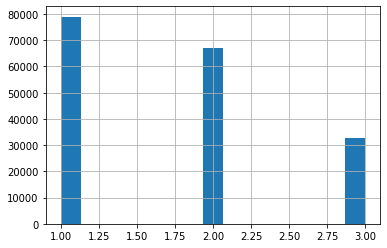

In [223]:
del_df = data1.dropna()
del_df['Area Id'].hist(bins = 15)

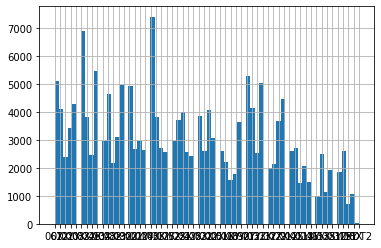

In [224]:
del_df['Beat'].hist(bins =70)

#### 3.4.2.2 用最高频率值来填补缺失值

使用经常报案的区域填充：

1.0    80056
2.0    67261
3.0    32699
Name: Area Id, dtype: int64
04X     7930
08X     6885
26Y     5478
30Y     5295
06X     5119
23X     5051
30X     4956
19X     4955
34X     4673
29X     4483
20X     4287
27Y     4159
07X     4134
31Y     4082
25X     4022
35X     3880
33X     3849
03X     3819
32X     3711
27X     3703
09X     3630
21Y     3435
32Y     3125
22X     3061
26X     2978
02Y     2970
10X     2967
14X     2733
03Y     2726
22Y     2664
12Y     2651
05X     2633
02X     2614
31X     2603
21X     2593
17Y     2582
24Y     2575
13Z     2546
15X     2509
24X     2459
12X     2422
10Y     2383
01X     2210
28X     2191
17X     2133
11X     2087
13Y     2017
35Y     1956
31Z     1870
18Y     1778
16Y     1561
14Y     1492
25Y     1482
13X     1122
18X     1063
16X      994
05Y      710
PDT2      20
Name: Beat, dtype: int64


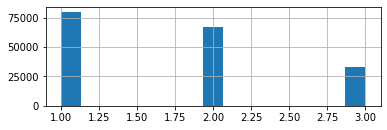

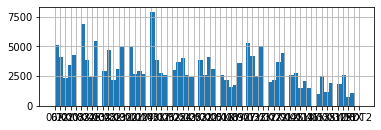

1.0    102468
2.0     84963
Name: Area Id, dtype: int64
04X     9072
08X     6691
30Y     5529
26Y     5374
23X     5301
19X     5158
30X     4988
34X     4965
20X     4682
06X     4676
29X     4606
25X     4396
03X     4380
35X     4291
07X     4235
31Y     3975
09X     3845
32X     3836
21Y     3822
27Y     3701
33X     3697
27X     3685
12Y     3344
32Y     3328
22X     3131
14X     3070
02Y     3043
03Y     3009
26X     2982
10X     2961
13Z     2946
02X     2798
10Y     2727
22Y     2725
24Y     2723
05X     2681
21X     2674
15X     2671
17Y     2635
12X     2491
24X     2483
31X     2482
28X     2321
01X     2193
11X     2165
17X     2127
35Y     1986
13Y     1898
31Z     1849
18Y     1816
16Y     1680
14Y     1578
25Y     1512
18X     1224
13X     1212
16X     1197
05Y      836
PDT2      28
Name: Beat, dtype: int64


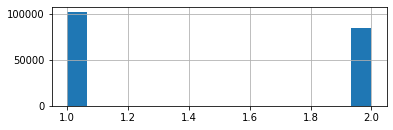

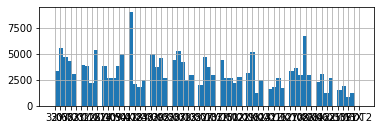

1.0    107474
2.0     80578
Name: Area Id, dtype: int64
04X     8875
08X     6993
30X     5440
30Y     5439
23X     5279
19X     5211
26Y     5188
34X     5059
06X     4786
20X     4565
29X     4531
25X     4530
03X     4483
07X     4416
31Y     4304
32X     4194
35X     4053
27Y     4026
21Y     3938
09X     3776
27X     3774
33X     3537
02Y     3522
12Y     3465
32Y     3465
22X     3095
03Y     2899
05X     2896
14X     2881
26X     2787
02X     2713
24X     2710
10X     2702
10Y     2641
22Y     2614
12X     2576
24Y     2571
17Y     2564
15X     2482
13Z     2383
31X     2361
01X     2309
28X     2294
21X     2289
17X     2091
31Z     2047
11X     1964
35Y     1950
13Y     1826
18Y     1817
14Y     1794
16Y     1720
25Y     1537
18X     1387
16X     1255
13X     1209
05Y      821
PDT2      18
Name: Beat, dtype: int64


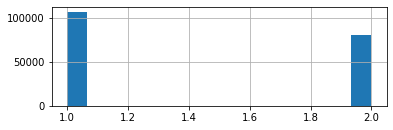

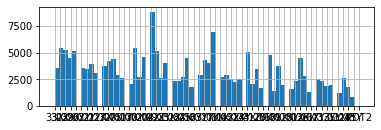

1.0    182818
2.0      3898
5.0       320
4.0       236
3.0       208
Name: Area Id, dtype: int64
04X     9085
08X     6723
30X     5539
23X     5485
30Y     5454
26Y     5377
19X     5290
06X     4931
34X     4865
03X     4727
27Y     4653
29X     4645
20X     4639
07X     4617
31Y     4541
25X     4372
35X     4240
27X     3912
32X     3833
21Y     3784
09X     3625
32Y     3622
02Y     3621
33X     3561
12Y     3214
03Y     3212
14X     2870
26X     2843
24X     2843
02X     2819
22X     2789
24Y     2673
10X     2566
10Y     2537
12X     2516
21X     2502
31X     2486
17Y     2480
05X     2442
13Z     2415
15X     2347
01X     2320
22Y     2297
28X     2186
11X     2092
31Z     2022
35Y     1860
17X     1860
14Y     1772
13Y     1720
18Y     1609
16Y     1495
25Y     1319
13X     1211
18X     1142
16X     1035
05Y      821
PDT2      24
Name: Beat, dtype: int64


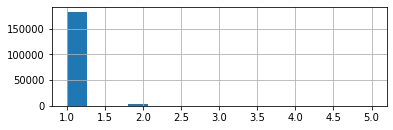

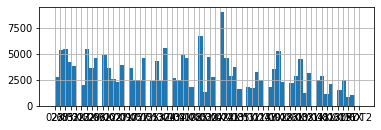

P3     81629
P1     73141
P2     33423
POU     3787
PCW      595
TEC        6
Name: Area Id, dtype: int64
04X     9373
08X     6874
30Y     5690
19X     5564
30X     5542
23X     5492
26Y     5449
34X     5172
06X     5056
03X     4983
07X     4910
29X     4599
31Y     4556
25X     4409
35X     4287
20X     4284
27Y     4242
32X     3940
27X     3899
12Y     3868
09X     3831
33X     3790
21Y     3574
03Y     3512
32Y     3456
14X     3290
02Y     3290
22X     3207
10Y     2937
26X     2802
24X     2733
10X     2705
28X     2579
24Y     2558
13Z     2555
01X     2552
17Y     2551
31X     2535
12X     2516
02X     2515
21X     2511
05X     2464
22Y     2456
15X     2437
35Y     2293
11X     2186
31Z     2127
14Y     1920
17X     1776
13Y     1734
18Y     1604
16Y     1577
25Y     1406
18X     1263
16X     1223
13X     1117
05Y      775
PDT2      35
Name: Beat, dtype: int64


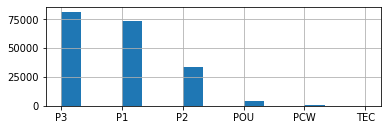

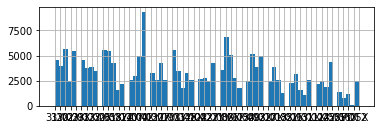

P3     47426
P1     41419
P2     19610
POU     2173
PCW      194
TEC        4
JLS        1
WAG        1
Name: Area Id, dtype: int64
04X     5096
08X     3931
26Y     3511
30Y     3473
19X     3455
30X     3416
03X     3195
23X     3076
34X     2857
07X     2831
20X     2702
29X     2646
06X     2580
03Y     2562
27Y     2517
25X     2467
31Y     2460
27X     2333
35X     2328
32X     2316
33X     2276
09X     2158
21Y     2100
32Y     2093
12Y     1987
14X     1832
26X     1766
02X     1746
24X     1704
02Y     1659
10Y     1573
10X     1557
22X     1541
17Y     1482
21X     1479
24Y     1454
31X     1439
22Y     1420
13Z     1397
15X     1393
05X     1342
01X     1304
12X     1299
31Z     1268
28X     1261
11X     1208
35Y     1159
18Y     1102
14Y     1027
17X      969
13Y      952
16Y      907
25Y      739
18X      721
16X      708
13X      630
05Y      408
PDT2      16
Name: Beat, dtype: int64


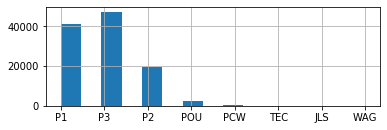

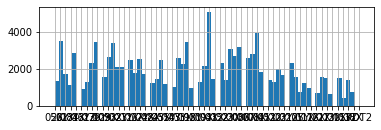

In [176]:
for data in data_all:
    fill_max = data.fillna({'Area Id': data['Area Id'].mode().item(), 'Beat': data['Beat'].mode().item()})
    print(fill_max['Area Id'].value_counts())
    print("=" * 30)
    print(fill_max['Beat'].value_counts())
    plt.subplot(2,1,1)
    fill_max['Area Id'].hist(bins = 15)
    plt.show()
    plt.subplot(2,1,2)
    fill_max['Beat'].hist(bins =70)
    plt.show()


#### 3.4.2.3 通过属性的相关关系来填补缺失值

第一步，计算属性间的相关系数。

In [159]:
for data in data_all:
    x = data.corr()
    print(x)

           Area Id  Priority
Area Id   1.000000 -0.023366
Priority -0.023366  1.000000
            Area Id  Priority  Zip Codes
Area Id    1.000000 -0.038554   0.023045
Priority  -0.038554  1.000000   0.010370
Zip Codes  0.023045  0.010370   1.000000
           Area Id  Priority
Area Id   1.000000 -0.027769
Priority -0.027769  1.000000
            Area Id  Priority  Zip Codes
Area Id    1.000000 -0.025323        NaN
Priority  -0.025323  1.000000   0.003855
Zip Codes       NaN  0.003855   1.000000
          Priority
Priority       1.0
          Priority
Priority       1.0


可以观察到Area Id和Priority的相关关系很小，基本不相关，综合案件位置和案件区域，它们之间可能存在着一定的关系，所以计划利用Location和Area Id的相关关系填补缺失值。

In [205]:
loc_area = {}

P = data1.dropna()
loc = P['Location']
area= P['Area Id']
loc = loc.values
area = area.values
for l,a in zip(loc,area):
    loc_area[l] = a

data_1 = data1[['Location','Area Id']]

for i in range(len(data_1)):
    # strr = data_4['Area Id'][i]
    if np.isnan(data_1['Area Id'][i]):
        a = data_1['Location'][i]
        if a in loc_area:
            th = loc_area[a]
            data_1.loc[i, 'Area Id'] = th  
print(data_1.isnull()['Area Id'].sum())

252


Text(0.5, 1.0, '2011')

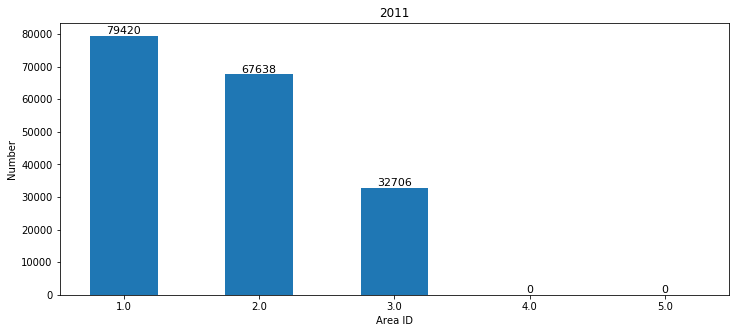

In [222]:

index = np.arange(5)
lis = data_1['Area Id']
lis = lis.dropna()
lis = lis.values
Area_count=np.zeros(5)
for t in lis:
    Area_count[int(t)-1] += 1
plt.figure(figsize=(12,5))
plt.bar(index,Area_count, 0.5, label="Area_count")
plt.xticks(index,('1.0','2.0','3.0','4.0','5.0'))
for a,b in zip(index,Area_count):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
plt.xlabel("Area ID")
plt.ylabel("Number")  
plt.title(2011)

和填充之前的图进行对比可以了解到，每个区域的案件数量都有所增长，这说明根据Location填补了一些缺失数据，但是仍然有252个尚未填补，这可能需要根据其他年份的数据进行填充，或者案件位置过于特殊，还不存在Area ID。

#### 3.4.2.4 通过数据对象之间的相似性来填补缺失值

根据Beat的相似性，来计算填补缺失的Area Id：

In [227]:
Beat_area = {}

P = data1.dropna()
beat = P['Beat']
area= P['Area Id']
beat = beat.values
area = area.values
for b,a in zip(beat,area):
    Beat_area[l] = a

data_1 = data1[['Beat','Area Id']]

for i in range(len(data_1)):
    # strr = data_4['Area Id'][i]
    if np.isnan(data_1['Area Id'][i]):
        a = data_1['Beat'][i]
        if a in Beat_area:
            th = Beat_area[a]
            data_1.loc[i, 'Area Id'] = th  
print(data_1.isnull()['Area Id'].sum())

904


由于缺失的值只占很少的部分，所以对于频数分布来说并没有什么变化。